In [1]:
import numpy as np
import pandas as pd

In [2]:
over_results = pd.read_csv("over_based_results.txt", header = 0, sep = '\t')
net_results = pd.read_csv("net_based_result.txt", header = 0, sep = '\t')

In [3]:
over_human = over_results[over_results['Species']=='Homo sapiens']
net_human= net_results[net_results['Species']=='Homo sapiens']

array([[<AxesSubplot:title={'center':'Jaccard Score'}>]], dtype=object)

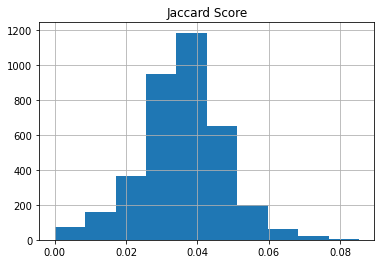

In [4]:
over_human.drop_duplicates(subset = 'Drug').hist(column = 'Jaccard Score')

In [5]:
over_human.drop_duplicates(subset = 'Drug')['Jaccard Score'].describe()

count    3672.000000
mean        0.035747
std         0.011551
min         0.000000
25%         0.029112
50%         0.036207
75%         0.042793
max         0.085271
Name: Jaccard Score, dtype: float64

In [6]:
net_human.drop_duplicates(subset = 'Drug')

,Drug,Species,Tissue,Study,Time,Dose,Control sample size,Treatment sample size,Database,Method,...,ADRrank_mod26,ADRscore_mod27,ADRrank_mod27,ADRscore_mod28,ADRrank_mod28,ADRscore_mod29,ADRrank_mod29,hepatotox_complete_signature,hepatotox_complete_signature_rank,SIDER_link
88,Azathioprine,Homo sapiens,liver,In Vitro,24hr,72.8 uM,2,2,TGGATEs,limma,...,0.984972,1.710246,0.207459,2.880866,0.567122,-0.094494,0.852195,-0.290903,0.5152,http://sideeffects.embl.de/drugs/2265
107,Fluoxetine,Homo sapiens,liver,In Vitro,24hr,8 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/3386
109,Etoposide,Homo sapiens,liver,In Vitro,24hr,66 uM,2,2,TGGATEs,limma,...,0.991432,-0.798304,0.858472,0.305132,0.832906,-0.129906,0.858288,-1.894850,0.8986,http://sideeffects.embl.de/drugs/3310
111,Rotenone,Homo sapiens,liver,In Vitro,24hr,2 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
112,Ethambutol,Homo sapiens,liver,In Vitro,8hr,800 uM,2,2,TGGATEs,limma,...,0.833776,-1.298403,0.926235,0.128626,0.860533,0.554333,0.737836,-0.452283,0.5703,http://sideeffects.embl.de/drugs/3279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,"Interleukin 6, human",Homo sapiens,liver,In Vitro,2hr,2 ng/mL,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
5251,Chlormadinone,Homo sapiens,liver,In Vitro,24hr,8 uM,2,2,TGGATEs,limma,...,0.894804,0.965570,0.384037,1.831810,0.654632,-0.619401,0.921378,-0.632292,0.6308,none
5264,"Interferon alpha, human",Homo sapiens,liver,In Vitro,limma combined,limma combined,4,12,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
6090,Cycloheximide,Homo sapiens,liver,In Vitro,limma combined,limma combined,4,12,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none


In [7]:
all_drugs = pd.merge(left = over_human.drop_duplicates(subset = 'Drug'),
                    right = net_human.drop_duplicates(subset = 'Drug'),
                     on = 'Drug',how = 'outer')

In [8]:
all_drugs

,Database_x,Method_x,Drug,Species_x,Tissue or Cell Line,Study_x,Dose_x,Time_x,Jaccard Score,Odds Ratio,...,ADRrank_mod26,ADRscore_mod27,ADRrank_mod27,ADRscore_mod28,ADRrank_mod28,ADRscore_mod29,ADRrank_mod29,hepatotox_complete_signature,hepatotox_complete_signature_rank,SIDER_link_y
0,L1000_LJP001_SKBR3_24H,Characteristic direction,Crizotinib,Homo sapiens,SKBR3,In Vitro,10 uM,24hr,0.085271,22.445739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L1000_CPC011_VCAP_24H,Characteristic direction,Vincristine,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.083524,24.243841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L1000_LJP001_MCF7_6H,Characteristic direction,AZD-7762,Homo sapiens,MCF7,In Vitro,2 uM,6hr,0.075610,27.851953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L1000_CPC009_VCAP_24H,Characteristic direction,VU-0365118-1,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074561,18.781644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L1000_CPC008_MCF7_6H,Characteristic direction,BRD-K32636001,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.074492,20.430394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,GSE38050,Characteristic direction,Paraoxon,Homo sapiens,embryonic structure,PharmOmics meta,PharmOmics meta,PharmOmics meta,0.001203,0.379673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668,TG-GATEs,limma,Acetamide,Homo sapiens,liver,In Vitro,400 uM,8hr,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
3669,TG-GATEs,limma,Monocrotaline,Homo sapiens,liver,In Vitro,18 uM,8hr,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
3670,TG-GATEs,limma,Nitrosodiethylamine,Homo sapiens,liver,In Vitro,2000 uM,8hr,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none


In [9]:
over_human_p = over_human[over_human['P value']<0.05].drop_duplicates(subset = 'Drug').reset_index(drop = True)

In [10]:
over_human.reset_index(drop = True).sort_values(by = 'Jaccard Score',ascending = False ).head(20)

,Database,Method,Drug,Species,Tissue or Cell Line,Study,Dose,Time,Jaccard Score,Odds Ratio,P value,Within Species Rank,Overlap,nOverlap,allsignatures_up,allsignatures_down,allsignatures_combined,SIDER_link
0,L1000_LJP001_SKBR3_24H,Characteristic direction,Crizotinib,Homo sapiens,SKBR3,In Vitro,10 uM,24hr,0.085271,22.445739,1.393469e-67,1.000000,"FBLN1, FBLN5, DCN, IRX5, CTSK, RAMP1, RBP1, LP...",77,"TGM2,SCGB1D2,ACTG2,DNAJC12,CKM,IDI1,PLK2,LIF,S...","FXYD6,COL11A1,CRKL,GNPTAB,PBX3,SLC6A8,HBB,ZFAN...","ACTG2,CKM,PBX3,SYNGR2,LIF,TPBG,MFAP4,MYL2,MFAP...",none
1,L1000_CPC011_VCAP_24H,Characteristic direction,Vincristine,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.083524,24.243841,3.218808e-66,0.999968,"HEPH, MMP19, PLK1, TSPAN13, OGN, S100A6, MFAP5...",73,"HEPH,TIMP3,MMP19,KIAA0182,PLK1,KIAA0226L,TSPAN...","PTGS1,ADD3,LRPPRC,PCCB,GALC,CD34,CLDN10,BGN,TX...","ELANE,ADD3,HRSP12,SLC6A8,CD34,STEAP3,CD36,TXND...",http://sideeffects.embl.de/drugs/5978
2,L1000_LJP001_MCF7_6H,Characteristic direction,AZD-7762,Homo sapiens,MCF7,In Vitro,2 uM,6hr,0.075610,27.851953,1.225767e-59,0.999936,"PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...",62,"PTGS1,TSPAN4,ACTG2,PLK1,IDI1,PLK2,NQO2,ERGIC3,...","HSPA2,SFTPB,SFTPC,NRCAM,IFI27,FAM3C,CD36,N4BP2...","HSPA2,HSPA6,ACTG2,IFI27,FAM3C,ERGIC3,CD36,N4BP...",none
3,L1000_CPC009_VCAP_24H,Characteristic direction,VU-0365118-1,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074561,18.781644,9.573364e-56,0.999903,"PLK1, TSPAN13, MFAP5, KIF2C, RBP4, FSTL1, SRPX...",68,"PCK1,TIMP3,PLK1,NDUFB6,IFI27,TSPAN13,PLK4,MFAP...","BCL2L1,TGM2,ASB13,SFTPB,KIAA0182,IDI1,CPD,CD36...","NDUFB6,IFI27,CPD,C3ORF14,CD36,BORA,MFAP5,ASB13...",none
4,L1000_CPC008_MCF7_6H,Characteristic direction,BRD-K32636001,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.074492,20.430394,3.640751e-56,0.999871,"TIMP1, FBLN1, GSN, DCN, COL1A1, TCF21, CRISPLD...",66,"CD52,TIMP3,CPM,TIMP1,CKB,ZFPM2,FBXO11,GSTA1,NE...","FRYL,PROM1,HBD,RAD9A,POLG2,CPD,ATF7IP,TXNDC9,C...","ASXL2,CPM,CKB,RAD9A,FBXO11,CPD,SCG2,ATF7IP,TXN...",none
5,L1000_CPC020_VCAP_24H,Characteristic direction,Mebendazole,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074408,20.332095,4.708322e-56,0.999839,"PLK1, MEIS2, GPM6A, FBLN1, KIF2C, TPX2, TSPAN1...",66,"TGM2,NETO2,TIMP3,CPM,PLK1,HSPA8,CD36,MEIS2,VTC...","TRAPPC2L,LIN7A,ADD3,IFI27,TMEM176B,CPD,OSBPL1A...","TRAPPC2L,ADD3,CPM,IFI27,HSPA8,CPD,CD36,MEIS2,G...",http://sideeffects.embl.de/drugs/4030
6,L1000_CPC013_SKB_24H,Characteristic direction,AT-7519,Homo sapiens,SKB,In Vitro,10 uM,24hr,0.074241,20.137563,7.847925e-56,0.999807,"TSPAN13, PCSK6, MFAP5, MFAP2, FBLN1, DCN, SPIN...",66,"FKBP14,ADD3,MXRA7,MAN2B1,SCG5,TSPAN13,PCSK6,CP...","SMPDL3A,PPAP2B,MYH11,MYBPC1,PLK2,TXNDC9,IST1,B...","FKBP14,ADD3,PPAP2B,SCG5,HSPA8,PCSK6,CPE,MEIS2,...",none
7,L1000_CPC006_HCC515_24H,Characteristic direction,Pimozide,Homo sapiens,HCC515,In Vitro,10 uM,24hr,0.073908,19.780606,2.151780e-55,0.999774,"PTGS2, BGN, GPM6A, APOC3, FBLN1, DCN, NID2, FM...",66,"FXYD6,PTGS2,LIF,FXYD3,SCG5,LRRC16A,GSTA1,BGN,C...","DARS,HBD,PPP2R3A,LTB,NQO1,TXNDC9,CHI3L2,PBXIP1...","HSPA6,SCG5,LRRC16A,BGN,IL6ST,TXNDC9,RAPGEF5,P4...",none
8,L1000_HDAC002_MCF7_6H,Characteristic direction,Entinostat,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.073718,17.317559,1.602616e-54,0.999742,"BGN, PODXL, MFAP5, MFAP2, VNN1, DCN, SFRP4, NI...",69,"CD38,TGM2,FXYD5,MAN2B2,PPAP2B,NCF2,ZFPM2,PPP2R...","ELANE,FXYD3,FKBP11,IDI1,L1CAM,DARC,METTL21D,MS...","CD38,ELANE,PPAP2B,FKBP11,S100A9,KRT14,BGN,IL6S...",none
9,L1000_CPC020_VCAP_24H,Characteristic direction,Podophyllotoxin,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.073661,19.501518,4.533504e-55,0.999710,"PLK1, GPM6A, FBLN5, DCN, TPX2, SLIT2, CENPF, C...",66,"TGM2,EPHX1,PLK1,HIST1H4J,CCR2,PLK2,CD36,SNAI2,...","MXRA7,RAD9A,POLG2,CD34,CHN1,MARCH6,CHI3L1,IGKC...","HIST1H4J,RAD9A,POLG2,CD34,CD36,CHN1,ANP32E,GPM...",none


In [11]:
over_human.reset_index(drop = True).sort_values(by = 'P value').head(20)

,Database,Method,Drug,Species,Tissue or Cell Line,Study,Dose,Time,Jaccard Score,Odds Ratio,P value,Within Species Rank,Overlap,nOverlap,allsignatures_up,allsignatures_down,allsignatures_combined,SIDER_link
0,L1000_LJP001_SKBR3_24H,Characteristic direction,Crizotinib,Homo sapiens,SKBR3,In Vitro,10 uM,24hr,0.085271,22.445739,1.393469e-67,1.000000,"FBLN1, FBLN5, DCN, IRX5, CTSK, RAMP1, RBP1, LP...",77,"TGM2,SCGB1D2,ACTG2,DNAJC12,CKM,IDI1,PLK2,LIF,S...","FXYD6,COL11A1,CRKL,GNPTAB,PBX3,SLC6A8,HBB,ZFAN...","ACTG2,CKM,PBX3,SYNGR2,LIF,TPBG,MFAP4,MYL2,MFAP...",none
1,L1000_CPC011_VCAP_24H,Characteristic direction,Vincristine,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.083524,24.243841,3.218808e-66,0.999968,"HEPH, MMP19, PLK1, TSPAN13, OGN, S100A6, MFAP5...",73,"HEPH,TIMP3,MMP19,KIAA0182,PLK1,KIAA0226L,TSPAN...","PTGS1,ADD3,LRPPRC,PCCB,GALC,CD34,CLDN10,BGN,TX...","ELANE,ADD3,HRSP12,SLC6A8,CD34,STEAP3,CD36,TXND...",http://sideeffects.embl.de/drugs/5978
2,L1000_LJP001_MCF7_6H,Characteristic direction,AZD-7762,Homo sapiens,MCF7,In Vitro,2 uM,6hr,0.075610,27.851953,1.225767e-59,0.999936,"PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...",62,"PTGS1,TSPAN4,ACTG2,PLK1,IDI1,PLK2,NQO2,ERGIC3,...","HSPA2,SFTPB,SFTPC,NRCAM,IFI27,FAM3C,CD36,N4BP2...","HSPA2,HSPA6,ACTG2,IFI27,FAM3C,ERGIC3,CD36,N4BP...",none
4,L1000_CPC008_MCF7_6H,Characteristic direction,BRD-K32636001,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.074492,20.430394,3.640751e-56,0.999871,"TIMP1, FBLN1, GSN, DCN, COL1A1, TCF21, CRISPLD...",66,"CD52,TIMP3,CPM,TIMP1,CKB,ZFPM2,FBXO11,GSTA1,NE...","FRYL,PROM1,HBD,RAD9A,POLG2,CPD,ATF7IP,TXNDC9,C...","ASXL2,CPM,CKB,RAD9A,FBXO11,CPD,SCG2,ATF7IP,TXN...",none
5,L1000_CPC020_VCAP_24H,Characteristic direction,Mebendazole,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074408,20.332095,4.708322e-56,0.999839,"PLK1, MEIS2, GPM6A, FBLN1, KIF2C, TPX2, TSPAN1...",66,"TGM2,NETO2,TIMP3,CPM,PLK1,HSPA8,CD36,MEIS2,VTC...","TRAPPC2L,LIN7A,ADD3,IFI27,TMEM176B,CPD,OSBPL1A...","TRAPPC2L,ADD3,CPM,IFI27,HSPA8,CPD,CD36,MEIS2,G...",http://sideeffects.embl.de/drugs/4030
6,L1000_CPC013_SKB_24H,Characteristic direction,AT-7519,Homo sapiens,SKB,In Vitro,10 uM,24hr,0.074241,20.137563,7.847925e-56,0.999807,"TSPAN13, PCSK6, MFAP5, MFAP2, FBLN1, DCN, SPIN...",66,"FKBP14,ADD3,MXRA7,MAN2B1,SCG5,TSPAN13,PCSK6,CP...","SMPDL3A,PPAP2B,MYH11,MYBPC1,PLK2,TXNDC9,IST1,B...","FKBP14,ADD3,PPAP2B,SCG5,HSPA8,PCSK6,CPE,MEIS2,...",none
3,L1000_CPC009_VCAP_24H,Characteristic direction,VU-0365118-1,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074561,18.781644,9.573364e-56,0.999903,"PLK1, TSPAN13, MFAP5, KIF2C, RBP4, FSTL1, SRPX...",68,"PCK1,TIMP3,PLK1,NDUFB6,IFI27,TSPAN13,PLK4,MFAP...","BCL2L1,TGM2,ASB13,SFTPB,KIAA0182,IDI1,CPD,CD36...","NDUFB6,IFI27,CPD,C3ORF14,CD36,BORA,MFAP5,ASB13...",none
7,L1000_CPC006_HCC515_24H,Characteristic direction,Pimozide,Homo sapiens,HCC515,In Vitro,10 uM,24hr,0.073908,19.780606,2.151780e-55,0.999774,"PTGS2, BGN, GPM6A, APOC3, FBLN1, DCN, NID2, FM...",66,"FXYD6,PTGS2,LIF,FXYD3,SCG5,LRRC16A,GSTA1,BGN,C...","DARS,HBD,PPP2R3A,LTB,NQO1,TXNDC9,CHI3L2,PBXIP1...","HSPA6,SCG5,LRRC16A,BGN,IL6ST,TXNDC9,RAPGEF5,P4...",none
9,L1000_CPC020_VCAP_24H,Characteristic direction,Podophyllotoxin,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.073661,19.501518,4.533504e-55,0.999710,"PLK1, GPM6A, FBLN5, DCN, TPX2, SLIT2, CENPF, C...",66,"TGM2,EPHX1,PLK1,HIST1H4J,CCR2,PLK2,CD36,SNAI2,...","MXRA7,RAD9A,POLG2,CD34,CHN1,MARCH6,CHI3L1,IGKC...","HIST1H4J,RAD9A,POLG2,CD34,CD36,CHN1,ANP32E,GPM...",none
8,L1000_HDAC002_MCF7_6H,Characteristic direction,Entinostat,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.073718,17.317559,1.602616e-54,0.999742,"BGN, PODXL, MFAP5, MFAP2, VNN1, DCN, SFRP4, NI...",69,"CD38,TGM2,FXYD5,MAN2B2,PPAP2B,NCF2,ZFPM2,PPP2R...","ELANE,FXYD3,FKBP11,IDI1,L1CAM,DARC,METTL21D,MS...","CD38,ELANE,PPAP2B,FKBP11,S100A9,KRT14,BGN,IL6S...",none


In [12]:
over_human_p[over_human_p['Jaccard Score']>over_human_p['Jaccard Score'].describe()['mean']]

,Database,Method,Drug,Species,Tissue or Cell Line,Study,Dose,Time,Jaccard Score,Odds Ratio,P value,Within Species Rank,Overlap,nOverlap,allsignatures_up,allsignatures_down,allsignatures_combined,SIDER_link
0,L1000_LJP001_SKBR3_24H,Characteristic direction,Crizotinib,Homo sapiens,SKBR3,In Vitro,10 uM,24hr,0.085271,22.445739,1.393469e-67,1.000000,"FBLN1, FBLN5, DCN, IRX5, CTSK, RAMP1, RBP1, LP...",77,"TGM2,SCGB1D2,ACTG2,DNAJC12,CKM,IDI1,PLK2,LIF,S...","FXYD6,COL11A1,CRKL,GNPTAB,PBX3,SLC6A8,HBB,ZFAN...","ACTG2,CKM,PBX3,SYNGR2,LIF,TPBG,MFAP4,MYL2,MFAP...",none
1,L1000_CPC011_VCAP_24H,Characteristic direction,Vincristine,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.083524,24.243841,3.218808e-66,0.999968,"HEPH, MMP19, PLK1, TSPAN13, OGN, S100A6, MFAP5...",73,"HEPH,TIMP3,MMP19,KIAA0182,PLK1,KIAA0226L,TSPAN...","PTGS1,ADD3,LRPPRC,PCCB,GALC,CD34,CLDN10,BGN,TX...","ELANE,ADD3,HRSP12,SLC6A8,CD34,STEAP3,CD36,TXND...",http://sideeffects.embl.de/drugs/5978
2,L1000_LJP001_MCF7_6H,Characteristic direction,AZD-7762,Homo sapiens,MCF7,In Vitro,2 uM,6hr,0.075610,27.851953,1.225767e-59,0.999936,"PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...",62,"PTGS1,TSPAN4,ACTG2,PLK1,IDI1,PLK2,NQO2,ERGIC3,...","HSPA2,SFTPB,SFTPC,NRCAM,IFI27,FAM3C,CD36,N4BP2...","HSPA2,HSPA6,ACTG2,IFI27,FAM3C,ERGIC3,CD36,N4BP...",none
3,L1000_CPC009_VCAP_24H,Characteristic direction,VU-0365118-1,Homo sapiens,VCAP,In Vitro,10 uM,24hr,0.074561,18.781644,9.573364e-56,0.999903,"PLK1, TSPAN13, MFAP5, KIF2C, RBP4, FSTL1, SRPX...",68,"PCK1,TIMP3,PLK1,NDUFB6,IFI27,TSPAN13,PLK4,MFAP...","BCL2L1,TGM2,ASB13,SFTPB,KIAA0182,IDI1,CPD,CD36...","NDUFB6,IFI27,CPD,C3ORF14,CD36,BORA,MFAP5,ASB13...",none
4,L1000_CPC008_MCF7_6H,Characteristic direction,BRD-K32636001,Homo sapiens,MCF7,In Vitro,10 uM,6hr,0.074492,20.430394,3.640751e-56,0.999871,"TIMP1, FBLN1, GSN, DCN, COL1A1, TCF21, CRISPLD...",66,"CD52,TIMP3,CPM,TIMP1,CKB,ZFPM2,FBXO11,GSTA1,NE...","FRYL,PROM1,HBD,RAD9A,POLG2,CPD,ATF7IP,TXNDC9,C...","ASXL2,CPM,CKB,RAD9A,FBXO11,CPD,SCG2,ATF7IP,TXN...",none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,L1000_CPC002_PC3_6H,Characteristic direction,THM-I-94,Homo sapiens,PC3,In Vitro,10 uM,6hr,0.036157,7.402710,3.893848e-18,0.850546,"FADS3, PDGFRA, FBP1, AGT, FBLN5, GSN, DCN, CDH...",35,"CD22,EFNB2,PMAIP1,TM7SF2,HSPA2,HRSP12,IDI1,RAD...","PTGS2,PLK1,PTHLH,TPBG,PLK1S1,ANP32A,USP22,RREB...","HSPA2,PMAIP1,TM7SF2,PTGS2,HRSP12,CLDND1,RAD9A,...",none
1851,L1000_CPC009_PC3_24H,Characteristic direction,BRD-K37141476,Homo sapiens,PC3,In Vitro,10 uM,24hr,0.036145,11.974912,5.914093e-21,0.850433,"HAMP, TF, LPL, ZWINT, C1QB, C1QA, COL3A1, LUM,...",30,"FXYD3,HAMP,GSTA4,CD36,NEFH,TXNDC9,PKP1,S100A10...","ADD3,RNF11,NCF2,HBD,SF1,ABHD2,MFAP5,ANKRD11,RC...","ADD3,RNF11,CD36,DUSP5,TXNDC9,FADS1,MFAP5,SYNE1...",none
1852,L1000_LJP002_HS578T_24H,Characteristic direction,Tivantinib,Homo sapiens,HS578T,In Vitro,10 uM,24hr,0.036145,8.583252,6.233738e-19,0.850433,"FBP1, GSN, CD53, GATA3, KLF4, ARG2, LY86, THBS...",33,"HSPA2,FKBP14,LAPTM5,CPM,FKBP11,KIAA0226L,IFI27...","HIST1H4C,ADD3,MRPS30,ZDHHC13,TUSC3,DARS,CHD8,K...","HIST1H4C,HSPA2,FKBP14,TCTN1,ADD3,CPM,ZDHHC13,F...",none
1853,L1000_CPC009_HEPG2_6H,Characteristic direction,BRD-K82747512,Homo sapiens,HEPG2,In Vitro,10 uM,6hr,0.036117,9.384750,1.972001e-19,0.849966,"CCK, CXCL12, TIAM1, CDH1, BMP4, VIM, MYO5C, AC...",32,"PTGS1,TIMP3,COL11A1,UBL3,TMC5,KLK10,SPRED2,NQO...","TRDV3,PCK1,SFTPB,FXYD1,HRSP12,IFI27,TSPAN13,SS...","UBL3,HRSP12,IFI27,TPD52L1,SSFA2,TRDV3,IL6ST,CT...",none


In [232]:
over_human_p['Study'].value_counts()

In Vitro           3322
PharmOmics meta     306
Name: Study, dtype: int64

array([[<AxesSubplot:title={'center':'Jaccard Score'}>]], dtype=object)

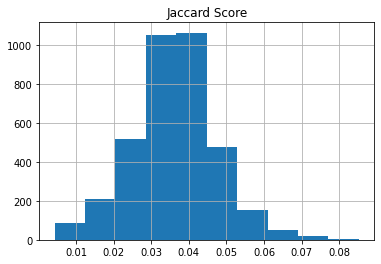

In [13]:
over_human_p.drop_duplicates(subset = 'Drug').hist(column = 'Jaccard Score')

In [14]:
over_human_p.iloc[2,:]

Database                                               L1000_LJP001_MCF7_6H
Method                                             Characteristic direction
Drug                                                               AZD-7762
Species                                                        Homo sapiens
Tissue or Cell Line                                                    MCF7
Study                                                              In Vitro
Dose                                                                   2 uM
Time                                                                    6hr
Jaccard Score                                                       0.07561
Odds Ratio                                                        27.851953
P value                                                                 0.0
Within Species Rank                                                0.999936
Overlap                   PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...
nOverlap    

In [15]:
over_human_p.loc[2,'Overlap'].replace(" ","").split(',')

['PLK1',
 'KIF2C',
 'DCN',
 'TPX2',
 'TYROBP',
 'CENPF',
 'SPAG5',
 'PSRC1',
 'CENPA',
 'POSTN',
 'CNN1',
 'FN1',
 'CD163',
 'NCAPG',
 'SPC25',
 'ACTA2',
 'CCK',
 'C1QB',
 'GREM1',
 'HDC',
 'COL3A1',
 'NEK2',
 'TOP2A',
 'HMMR',
 'BUB1',
 'CPA3',
 'VNN1',
 'CYTL1',
 'PBK',
 'CDC20',
 'CD14',
 'MGP',
 'MYH11',
 'EPHA3',
 'KRT7',
 'NDC80',
 'LUM',
 'ASPM',
 'SPARC',
 'TFPI',
 'VSIG4',
 'COL5A2',
 'COL1A2',
 'COL1A1',
 'CDH11',
 'MKI67',
 'HMGB2',
 'BIRC5',
 'CEP55',
 'VCAN',
 'PRC1',
 'RNASE4',
 'CCNA2',
 'CDCA3',
 'AURKA',
 'CDCA8',
 'CENPE',
 'BEX1',
 'CCNB2',
 'CFH',
 'C3AR1',
 'CFD']

In [16]:
over_human_p.loc[2,'nOverlap']

62

In [17]:
len(over_human_p.loc[2,'allsignatures_up'].split(','))

206

In [18]:
len(over_human_p.loc[2,'allsignatures_down'].split(','))

216

In [19]:
over_human_p.Study.value_counts()

In Vitro           3322
PharmOmics meta     306
Name: Study, dtype: int64

In [20]:
oooover = over_human_p[['Drug','Jaccard Score','Odds Ratio' ,'P value','Overlap','nOverlap','allsignatures_combined']].head(200)

In [21]:
oooover['ndruggene'] = 0
oooover['overONdrug'] = 0
for i in range(len(oooover)):
    oooover.loc[i,'ndruggene'] = len(oooover.loc[i,'allsignatures_combined'].replace(" ","").split(','))
    oooover.loc[i,'overONdrug'] = int(oooover.loc[i,'nOverlap']) / int(oooover.loc[i,'ndruggene'])

In [22]:
oooover.sort_values(by ='overONdrug' , ascending = False)

,Drug,Jaccard Score,Odds Ratio,P value,Overlap,nOverlap,allsignatures_combined,ndruggene,overONdrug
0,Crizotinib,0.085271,22.445739,1.393469e-67,"FBLN1, FBLN5, DCN, IRX5, CTSK, RAMP1, RBP1, LP...",77,"ACTG2,CKM,PBX3,SYNGR2,LIF,TPBG,MFAP4,MYL2,MFAP...",479,0.160752
1,Vincristine,0.083524,24.243841,3.218808e-66,"HEPH, MMP19, PLK1, TSPAN13, OGN, S100A6, MFAP5...",73,"ELANE,ADD3,HRSP12,SLC6A8,CD34,STEAP3,CD36,TXND...",456,0.160088
7,Pimozide,0.073908,19.780606,2.151780e-55,"PTGS2, BGN, GPM6A, APOC3, FBLN1, DCN, NID2, FM...",66,"HSPA6,SCG5,LRRC16A,BGN,IL6ST,TXNDC9,RAPGEF5,P4...",442,0.149321
2,AZD-7762,0.075610,27.851953,1.225767e-59,"PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...",62,"HSPA2,HSPA6,ACTG2,IFI27,FAM3C,ERGIC3,CD36,N4BP...",422,0.146919
5,Mebendazole,0.074408,20.332095,4.708322e-56,"PLK1, MEIS2, GPM6A, FBLN1, KIF2C, TPX2, TSPAN1...",66,"TRAPPC2L,ADD3,CPM,IFI27,HSPA8,CPD,CD36,MEIS2,G...",450,0.146667
...,...,...,...,...,...,...,...,...,...
149,BRD-K44417704,0.055422,18.829202,1.503011e-38,"PLK1, MFAP5, AGT, DCN, LBP, CTSG, RBP1, LPL, C...",46,"HSPA6,PPAP2A,WNT5A,STK10,HSPA8,EPB41L4B,CPE,TX...",464,0.099138
126,BRD-A25829966,0.056561,15.232888,6.436654e-38,"KCNE4, BGN, FBLN1, PAM, DCN, RNASE4, OSBPL3, T...",50,"CD38,ELANE,PPAP2C,CKB,STK10,FBXO11,CPD,BGN,TXN...",510,0.098039
198,Cyanoquinoline-11,0.053531,14.677161,3.772766e-35,"PCSK6, MFAP5, FBLN1, AGT, PAM, FBLN5, DCN, FGG...",47,"ELANE,SMPDL3A,JUN,FBXO11,PCSK6,CPE,AGA,CD8A,MF...",490,0.095918
128,Bromoethylamine,0.056522,13.537762,3.906258e-37,"TOP2A, ZWINT, OIP5, RRM2, PBK, ANLN, PCP4L1, D...",52,"COL1A1,FAM160A1,SPDEF,TOP2A,EZH2,CCNE2,ZWINT,P...",567,0.091711


In [23]:
use_over = over_human_p[['Drug','Jaccard Score','Odds Ratio' ,'P value','Overlap','nOverlap']]

In [24]:
use_over

,Drug,Jaccard Score,Odds Ratio,P value,Overlap,nOverlap
0,Crizotinib,0.085271,22.445739,1.393469e-67,"FBLN1, FBLN5, DCN, IRX5, CTSK, RAMP1, RBP1, LP...",77
1,Vincristine,0.083524,24.243841,3.218808e-66,"HEPH, MMP19, PLK1, TSPAN13, OGN, S100A6, MFAP5...",73
2,AZD-7762,0.075610,27.851953,1.225767e-59,"PLK1, KIF2C, DCN, TPX2, TYROBP, CENPF, SPAG5, ...",62
3,VU-0365118-1,0.074561,18.781644,9.573364e-56,"PLK1, TSPAN13, MFAP5, KIF2C, RBP4, FSTL1, SRPX...",68
4,BRD-K32636001,0.074492,20.430394,3.640751e-56,"TIMP1, FBLN1, GSN, DCN, COL1A1, TCF21, CRISPLD...",66
...,...,...,...,...,...,...
3623,Tipranavir,0.005435,3.950149,2.212844e-02,"LY86, GPNMB, PTGDS, SOSTDC1",4
3624,Glatiramer acetate,0.005326,3.158913,4.318087e-02,"MGAM, THBD, TRIM59, FADS3",4
3625,T cell receptor antagonist,0.005326,3.158913,4.318087e-02,"MGAM, THBD, TRIM59, FADS3",4
3626,Vitamin a,0.004249,5.920534,1.735704e-02,"CD14, SERPIND1, LCN2",3


In [25]:
net_human['Z_score'].describe()

count    1074.000000
mean        1.838183
std         2.951344
min        -3.848016
25%        -0.194294
50%         0.877108
75%         3.460145
max        11.397006
Name: Z_score, dtype: float64

array([[<AxesSubplot:title={'center':'Z_score'}>]], dtype=object)

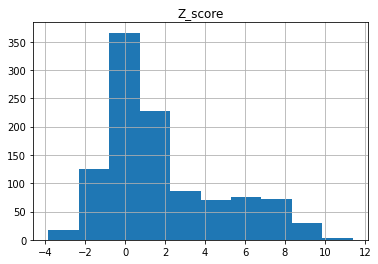

In [153]:
net_human.hist(column = 'Z_score')

In [27]:
net_human[net_human['Z_score']<-2]

,Drug,Species,Tissue,Study,Time,Dose,Control sample size,Treatment sample size,Database,Method,...,ADRrank_mod26,ADRscore_mod27,ADRrank_mod27,ADRscore_mod28,ADRrank_mod28,ADRscore_mod29,ADRrank_mod29,hepatotox_complete_signature,hepatotox_complete_signature_rank,SIDER_link
88,Azathioprine,Homo sapiens,liver,In Vitro,24hr,72.8 uM,2,2,TGGATEs,limma,...,0.984972,1.710246,0.207459,2.880866,0.567122,-0.094494,0.852195,-0.290903,0.5152,http://sideeffects.embl.de/drugs/2265
107,Fluoxetine,Homo sapiens,liver,In Vitro,24hr,8 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/3386
109,Etoposide,Homo sapiens,liver,In Vitro,24hr,66 uM,2,2,TGGATEs,limma,...,0.991432,-0.798304,0.858472,0.305132,0.832906,-0.129906,0.858288,-1.894850,0.8986,http://sideeffects.embl.de/drugs/3310
111,Rotenone,Homo sapiens,liver,In Vitro,24hr,2 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,none
112,Ethambutol,Homo sapiens,liver,In Vitro,8hr,800 uM,2,2,TGGATEs,limma,...,0.833776,-1.298403,0.926235,0.128626,0.860533,0.554333,0.737836,-0.452283,0.5703,http://sideeffects.embl.de/drugs/3279
120,Papaverine,Homo sapiens,liver,In Vitro,24hr,12 uM,2,2,TGGATEs,limma,...,0.853752,2.625385,0.081279,4.012964,0.490516,-1.343978,0.970952,-1.720367,0.8734,http://sideeffects.embl.de/drugs/4680
197,Acetaminophen,Homo sapiens,liver,In Vitro,24hr,200 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/1983
199,Lomustine,Homo sapiens,liver,In Vitro,2hr,120 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/3950
219,Sulfasalazine,Homo sapiens,liver,In Vitro,2hr,150 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/5353980
221,Tolbutamide,Homo sapiens,liver,In Vitro,24hr,2000 uM,2,2,TGGATEs,limma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,http://sideeffects.embl.de/drugs/5505


In [28]:

net_human_p = net_human[(net_human['Pvalue']<0.05)&(net_human['Z_score']<-2)].drop_duplicates(subset = 'Drug').reset_index(drop = True)

In [29]:
use_net = net_human_p[['Drug','Z_score','Pvalue',
                       'Drug_genes_directly_connected_to_input_gene',
                       'Input_genes_directly_connected_to_drug_gene']]

In [30]:
use_net

,Drug,Z_score,Pvalue,Drug_genes_directly_connected_to_input_gene,Input_genes_directly_connected_to_drug_gene
0,Azathioprine,-3.848016,0.000060,"ACOT11,PCSK5,CA5A,HSPA1B,SRXN1,TRIM16,AHSG,ALD...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."
1,Fluoxetine,-3.515680,0.000219,"RPS14,ACSM2A,ARSB,LZIC,PCNA,DNMT1,PKIB,CD55,FA...","KIF2C,CDCA8,NUF2,BIRC5,CCNB2,NCAPG,SPAG5,KIFC1..."
2,Etoposide,-3.493595,0.000238,"KIF18B,VSTM4,SPC24,CDKN3,EMP2,DEPDC1,MAD2L1,KI...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."
3,Rotenone,-3.436878,0.000294,"GNPTAB,NFATC1,ELOVL2,DOCK5,SYCP3","CDCA8,NUF2,BIRC5,CCNB2,NCAPG,SPAG5,CKAP2L,CDCA..."
4,Ethambutol,-3.397638,0.000340,none,"CDCA8,NUF2,BIRC5,NCAPG,SPAG5,LUM,CKAP2L,RRM2,C..."
5,Papaverine,-3.345395,0.000411,"LIN9,IL17RD,HSPA1B,RAI14,DDIT4,HSPA6,CDC25C,AD...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."
6,Acetaminophen,-2.732272,0.003145,P4HA3,"NUF2,ANXA2,FCGR2B,COLEC12,TNC,LGI2,BNC1,FADS3,..."
7,Lomustine,-2.722537,0.003239,"PHLDB2,OSBPL6,NCF1,BCAS1,MYH14","FNDC1,THBD,CFH,NID1,TCF21,GDF10,OLFML3,EMILIN2..."
8,Sulfasalazine,-2.663045,0.003872,"ZCWPW1,CD79B,CABP1,SPDEF,ZFP36","CDCA8,NCAPG,CKAP2L,RRM2,PBK,ROBO4,BUB1,MELK,TK..."
9,Tolbutamide,-2.646060,0.004072,"ARHGDIB,RAD51AP1,SLC25A15,MAOA,ACSL1,HGD,CTH,H...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."


In [31]:
merge_result = pd.merge(left = use_over, right = use_net, how = 'inner', on = 'Drug')

In [32]:
merge_result

,Drug,Jaccard Score,Odds Ratio,P value,Overlap,nOverlap,Z_score,Pvalue,Drug_genes_directly_connected_to_input_gene,Input_genes_directly_connected_to_drug_gene
0,Chlorpromazine,0.058957,16.046680,2.588731e-40,"PTGS2, PLK1, MFAP5, FBLN1, CXCL12, FSTL1, CENP...",52,-2.370568,0.008880,"KLK15,C12orf54,KCNH6,IGSF9","COL1A2,SMOC2,THBS2,FMOD,FN1,COL6A3,ADAMTS2,COL..."
1,Bromoethylamine,0.056522,13.537762,3.906258e-37,"TOP2A, ZWINT, OIP5, RRM2, PBK, ANLN, PCP4L1, D...",52,-2.476013,0.006643,PHLDB2,"CFH,NID1,OGN,COLEC12,MGP,SERTAD4"
2,Azathioprine,0.054461,15.858305,1.860055e-36,"PTGS2, LRRC17, CLU, GSN, FSTL1, BMP6, CXCL12, ...",47,-3.848016,0.000060,"ACOT11,PCSK5,CA5A,HSPA1B,SRXN1,TRIM16,AHSG,ALD...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."
3,Ethanol,0.049947,11.167659,1.546201e-30,"NEK2, PODXL, CTHRC1, LCN2, MMP7, RBP7, COL4A1,...",47,-2.309604,0.010455,TMEM123,"RRM2,THBD,TK1,SCARA3,ALDH1A2,GPM6A,NEK2,TMEFF2..."
4,Papaverine,0.043814,4.111852,2.861326e-28,"SERPINC1, APOH, PTGS2, FHL2, C1R, VTN, APOF, O...",102,-3.345395,0.000411,"LIN9,IL17RD,HSPA1B,RAI14,DDIT4,HSPA6,CDC25C,AD...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,ITGB..."
5,Fluoxetine,0.042857,13.622486,1.941778e-26,"PODXL, MFAP5, DCN, CPA3, SFRP4, FMOD, CTSK, SP...",36,-3.515680,0.000219,"RPS14,ACSM2A,ARSB,LZIC,PCNA,DNMT1,PKIB,CD55,FA...","KIF2C,CDCA8,NUF2,BIRC5,CCNB2,NCAPG,SPAG5,KIFC1..."
6,Hexachlorobenzene,0.042490,4.166296,9.754677e-25,"TCF19, ERCC6L, ID1, MYO5C, CDCA5, AKR1C3, RRM2...",86,-2.185867,0.014413,CCDC38,"COL1A2,CSF1R,PARPBP,PAM,EMP1,SOX7,THY1,OIT3,CDH5"
7,"Hepatocyte growth factor, human",0.041139,8.913398,1.499436e-22,"STEAP1, UHRF1, PDGFRA, GMNN, ZWINT, MCM2, DTL,...",39,-2.047527,0.020303,"SCN8A,UAP1,LEAP2,FANCL,CDC6,ZWINT,INHBE,SGK1,R...","KIF2C,CDCA8,NUF2,BIRC5,COL1A2,CCNB2,NCAPG,SPAG..."
8,Cimetidine,0.039909,10.773569,8.208727e-23,"PLK1, TSPAN13, PDGFRA, DCN, CXCL12, TCF21, C1Q...",35,-2.123635,0.016850,"IGHA2,C19orf44,DNM1,PADI1,ZNF8","SCARA3,COLEC12,COL8A2,WFDC2,PPL,ECEL1,SULF2,EC..."
9,Benzbromarone,0.039459,10.264381,3.364323e-22,"MFAP5, MFAP2, CRABP1, CD53, GATA3, IRX5, TSPAN...",35,-2.324776,0.010042,"HES7,POU2F2","KIF2C,CDCA8,NUF2,BIRC5,CCNB2,NCAPG,SPAG5,CKAP2..."


In [ ]:
# merge_result.to_csv("out_drugs.csv", index = False)

In [36]:
# merge_result[['Drug','Jaccard Score','P value','Z_score','Pvalue']].to_csv("predicted_drugs.csv", index = False)

PermissionError: [Errno 13] Permission denied: 'predicted_drugs.csv'

In [37]:
merge_result[['Drug','Jaccard Score','P value','Z_score','Pvalue']]

,Drug,Jaccard Score,P value,Z_score,Pvalue
0,Chlorpromazine,0.058957,2.588731e-40,-2.370568,0.008880
1,Bromoethylamine,0.056522,3.906258e-37,-2.476013,0.006643
2,Azathioprine,0.054461,1.860055e-36,-3.848016,0.000060
3,Ethanol,0.049947,1.546201e-30,-2.309604,0.010455
4,Papaverine,0.043814,2.861326e-28,-3.345395,0.000411
5,Fluoxetine,0.042857,1.941778e-26,-3.515680,0.000219
6,Hexachlorobenzene,0.042490,9.754677e-25,-2.185867,0.014413
7,"Hepatocyte growth factor, human",0.041139,1.499436e-22,-2.047527,0.020303
8,Cimetidine,0.039909,8.208727e-23,-2.123635,0.016850
9,Benzbromarone,0.039459,3.364323e-22,-2.324776,0.010042


In [33]:
rrr = pd.read_csv("Predict_Drug_Info.csv")

In [34]:
newR = pd.merge(left = merge_result[['Drug','Jaccard Score','P value','Z_score','Pvalue']],
               right = rrr,
               on = 'Drug',
               how = 'inner')

In [35]:
newR.sort_values(by = 'Jaccard Score',ascending = False).head(13)

,Drug,Jaccard Score,P value,Z_score,Pvalue,DrugBank,Cancer Type,Stage,CTD,Cancer Type.1,Direct Evidence,Google Scholar,Cancer Type.2,Stage.1,Stadard_Treatment,Potential_Drug,Highest_Stage
0,Chlorpromazine,0.058957,2.588731e-40,-2.370568,0.008880,NaN,NaN,NaN,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,"https://pubmed.ncbi.nlm.nih.gov/1910248/, http...",NSCLC,"In vitro, In vitro",Nil,Maybe,In vitro
1,Bromoethylamine,0.056522,3.906258e-37,-2.476013,0.006643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nil,Maybe,NaN
2,Azathioprine,0.054461,1.860055e-36,-3.848016,0.000060,NaN,NaN,NaN,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,https://onlinelibrary.wiley.com/doi/abs/10.100...,LUAD,"Report, Report, Report",Nil,Maybe,Report
3,Ethanol,0.049947,1.546201e-30,-2.309604,0.010455,https://go.drugbank.com/drugs/DB00898/clinical...,NSCLC,N/A&Not Yet Recruiting,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,https://www.hindawi.com/journals/ecam/2012/378...,LUAD,In vitro,Nil,Yes,In vitro
4,Papaverine,0.043814,2.861326e-28,-3.345395,0.000411,https://go.drugbank.com/drugs/DB01113/clinical...,LUSC,"Phase 1&Treatment, Phase 1&Treatment",NaN,NaN,NaN,https://www.mdpi.com/1420-3049/26/21/6388,LUAD,In vitro,Nil,Yes,In vitro
5,Fluoxetine,0.042857,1.941778e-26,-3.515680,0.000219,https://go.drugbank.com/drugs/DB00472/clinical...,NSCLC,Phase 2&Treatment,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,https://ar.iiarjournals.org/content/38/9/5201....,NSCLC,In vitro,"Yes, Symptom",Yes,Phase 2&Treatment
6,Hexachlorobenzene,0.042490,9.754677e-25,-2.185867,0.014413,NaN,NaN,NaN,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,https://www.sciencedirect.com/science/article/...,BRAC Promote,In vivo,Nil,No,In vivo
7,"Hepatocyte growth factor, human",0.041139,1.499436e-22,-2.047527,0.020303,NaN,NaN,NaN,NaN,NaN,NaN,https://cancerres.aacrjournals.org/content/68/...,LUAD Promote,"In vitro, In vitro",Nil,Maybe,In vitro
8,Cimetidine,0.039909,8.208727e-23,-2.123635,0.016850,NaN,NaN,NaN,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,https://www.sciencedirect.com/science/article/...,NSCLC,"In vivo, Phase 2&Insignificant",Nil,No,Phase 2&Insignificant
9,Benzbromarone,0.039459,3.364323e-22,-2.324776,0.010042,NaN,NaN,NaN,http://ctdbase.org/detail.go?type=relationship...,LUAD,Nil,NaN,NaN,NaN,Nil,Maybe,NaN


In [51]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

Text(0.5, 1.0, 'Histogram of Jaccard Score')

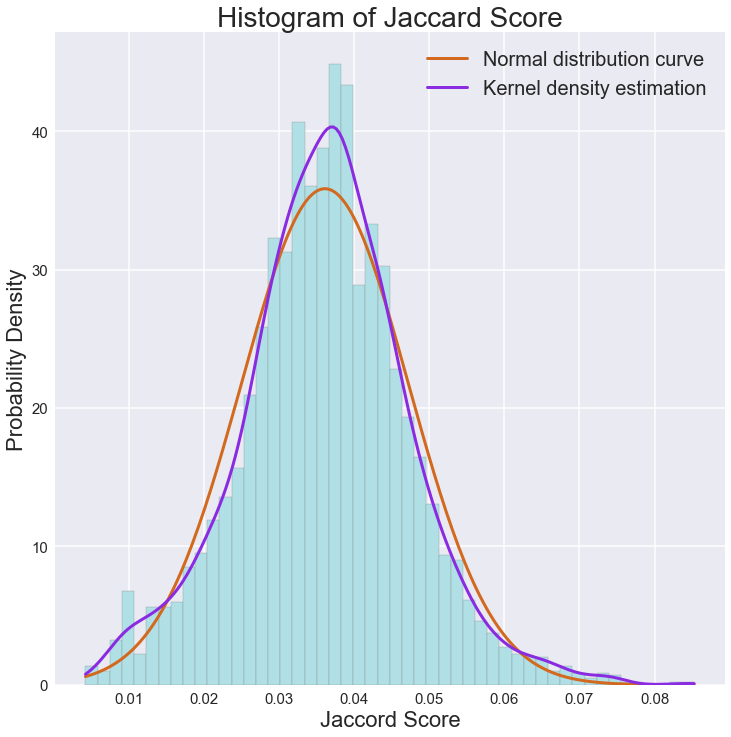

In [228]:
fig=plt.figure(figsize=(12, 12))
plt.hist(over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'], # 绘图数据
        bins = 50, # 指定直方图的组距
        density=True,stacked=True,
        color = 'powderblue', # 指定填充色
        edgecolor = 'gray') # 指定直方图的边界色
# 添加网格显示
plt.grid(linestyle="-", alpha=1,linewidth=1.5) 
x1 = np.linspace(over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].min(), 
                 over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].max(), 200)
normal = norm.pdf(x1, over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].mean(),
                      over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].std())
# 绘制正态分布曲线
line1, = plt.plot(x1,normal,'chocolate', linewidth = 3) 

kde = mlab.GaussianKDE(over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'])
x2 = np.linspace(over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].min(), 
                 over_human_p.drop_duplicates(subset = 'Drug')['Jaccard Score'].max(), 200)
# 绘制
line2, = plt.plot(x2,kde(x2),'blueviolet', linewidth = 3)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Jaccord Score',fontsize=22)
plt.ylabel('Probability Density',fontsize=22)
plt.legend([line1, line2],['Normal distribution curve','Kernel density estimation'],loc='best',fontsize=20)
plt.title('Histogram of Jaccard Score',fontsize=28)

c:\users\hhhrr\appdata\local\programs\python\python39\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Text(0.5, 1.0, 'Histogram of Z-score')

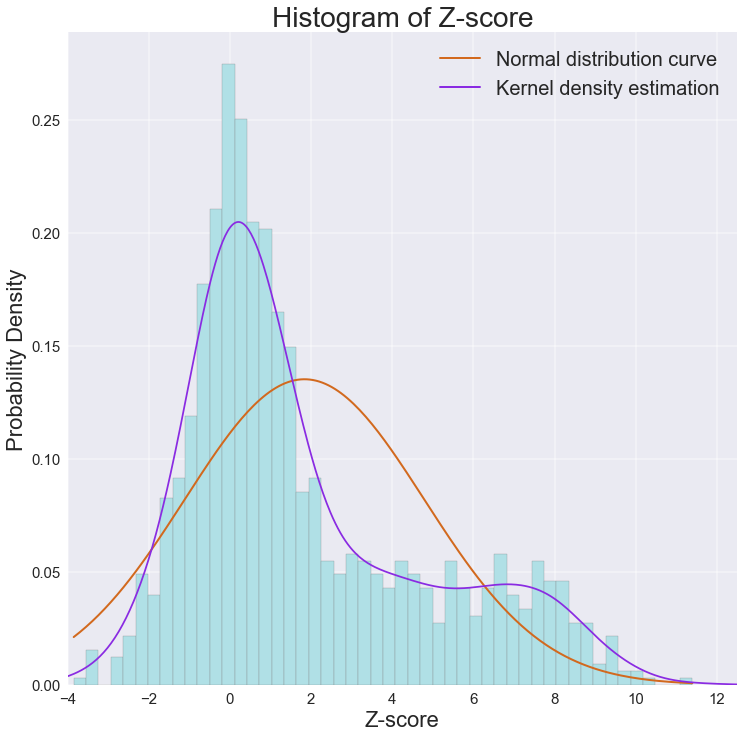

In [229]:
fig=plt.figure(figsize=(12, 12))
plt.hist(net_human['Z_score'], # 绘图数据
        bins = 50, # 指定直方图的组距
         density=True,stacked=True,
        color = 'powderblue', # 指定填充色
        edgecolor = 'gray') # 指定直方图的边界色

# 添加网格显示
plt.grid(linestyle="-", alpha=0.5,linewidth=1.5) 

x1 = np.linspace(net_human['Z_score'].min(), 
                 net_human['Z_score'].max(), 200)
normal = norm.pdf(x1, net_human['Z_score'].mean(),
                      net_human['Z_score'].std())
# 绘制正态分布曲线
line1, = plt.plot(x1,normal,'chocolate', linewidth = 2) 

kde = mlab.GaussianKDE(net_human['Z_score'])
x2 = np.linspace(net_human['Z_score'].min(), 
                 net_human['Z_score'].max(), 50)

net_human['Z_score'].plot(kind="kde",color="blueviolet")
# 绘制
line2, = plt.plot(x2,kde(x2),'blueviolet', linewidth = 2)
plt.xlim(-4,12.5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Z-score',fontsize=22)
plt.ylabel('Probability Density',fontsize=22)
plt.legend([line1, line2],['Normal distribution curve','Kernel density estimation'],loc='best',fontsize=20)
plt.title('Histogram of Z-score',fontsize=28)